In [183]:
import sklearn
sklearn.__version__

'1.2.2'

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [185]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### There are no missing values as such

In [187]:
data['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [188]:
data['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

### Converting Categorical Features to Numerical

In [189]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [190]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


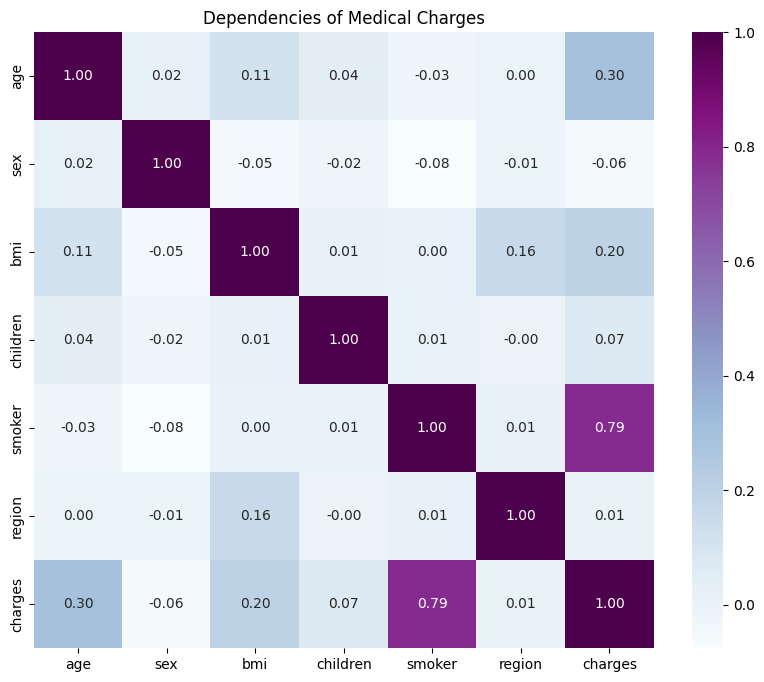

In [191]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")

plt.show()

### Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges.
We might drop these 3 columns as they have less correlation

In [192]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

sex
female    662
male      676
Name: count, dtype: int64
smoker
yes     274
no     1064
Name: count, dtype: int64
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64


### Prepating data - We can scale BMI and Charges Column before proceeding with Prediction

In [193]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

# tempCharges = data_pre.charges
# tempCharges = tempCharges.values.reshape(-1,1)
# data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()
data_pre.to_csv('new.csv', index=False)

In [194]:
# X = data_pre.drop('charges',axis=1).values
X = data_pre.drop(['charges', 'region'], axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 5)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 5)
Size of Y_test :  (268, 1)


In [195]:
X_train[0]

array([ 0.48366788,  1.        , -1.75747362,  2.        ,  0.        ])

In [196]:
import tensorflow as tf

In [197]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#For a regression model like the one you've defined, you typically evaluate its performance using regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), etc. Accuracy is not applicable for regression tasks since it's a metric used for classification tasks where predictions are categorical.

In [198]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
27/27 [==============================] - 0s 4ms/step - loss: 325444096.0000 - mae: 13517.7559 - val_loss: 310308608.0000 - val_mae: 12653.4561
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 325354240.0000 - mae: 13514.6982 - val_loss: 310176896.0000 - val_mae: 12648.8408
Epoch 3/50
27/27 [==============================] - 0s 1ms/step - loss: 325137216.0000 - mae: 13507.5049 - val_loss: 309867744.0000 - val_mae: 12638.2725
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 324660512.0000 - mae: 13491.5771 - val_loss: 309213120.0000 - val_mae: 12616.3994
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 323720416.0000 - mae: 13461.2939 - val_loss: 308013568.0000 - val_mae: 12576.9941
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 322095552.0000 - mae: 13407.8730 - val_loss: 306020704.0000 - val_mae: 12512.1055
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 3195

In [199]:
# Assuming 'model' is your trained model
model.save('NN_Model.h5')  # Saves to HDF5 format

In [200]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

# Assuming you have already trained your model and stored it in 'model'

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Make predictions using the model
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae}")


9/9 [==============================] - 0s 640us/step - loss: 79141712.0000 - mae: 6692.5352
Test Loss: 79141712.0, Test MAE: 6692.53515625
Test MAE: 6692.535639157373


In [201]:
# Make predictions
predictions = model.predict(X_test)
predictions[:10]

array([[14182.815 ],
       [ 9195.89  ],
       [23886.602 ],
       [13601.536 ],
       [11804.926 ],
       [12872.715 ],
       [ 2922.4917],
       [15558.316 ],
       [ 3152.57  ],
       [15500.956 ]], dtype=float32)

In [202]:
y_test[:10]

array([[ 9095.06825],
       [ 5272.1758 ],
       [29330.98315],
       [ 9301.89355],
       [33750.2918 ],
       [ 4536.259  ],
       [ 2117.33885],
       [14210.53595],
       [ 3732.6251 ],
       [10264.4421 ]])

In [203]:
X_test[:1]

array([[ 0.41246669,  1.        , -0.90034121,  2.        ,  0.        ]])

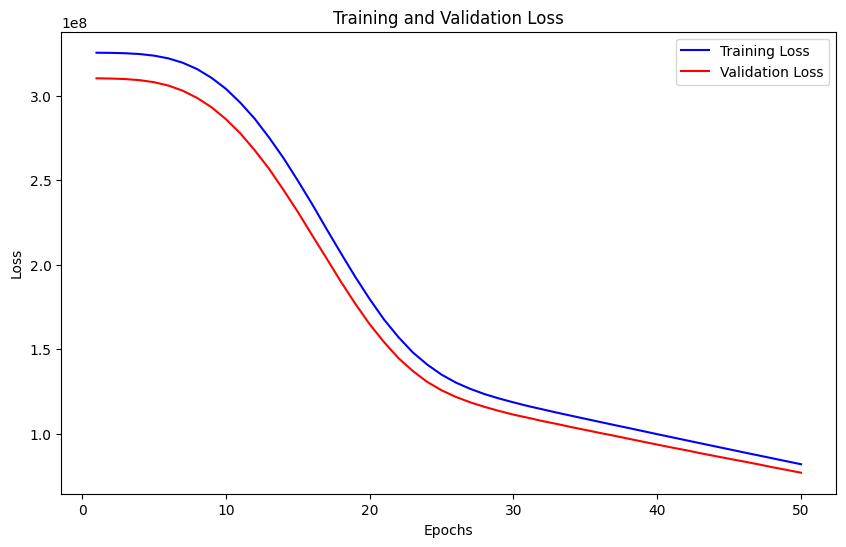

In [204]:
import matplotlib.pyplot as plt

# Get the training loss and validation loss from the history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(training_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


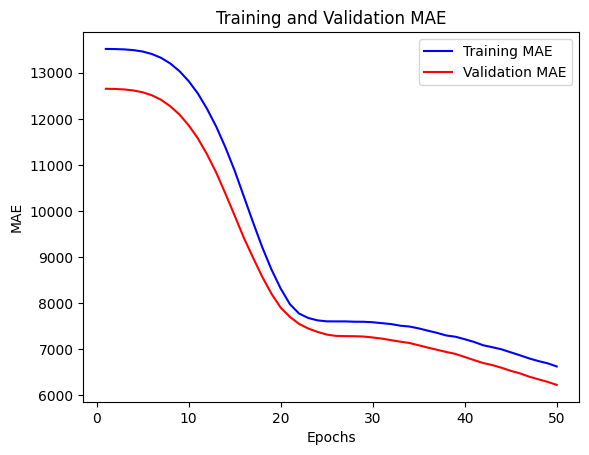

In [205]:
import matplotlib.pyplot as plt

# Get training and validation MAE from the history
training_mae = history.history['mae']
validation_mae = history.history['val_mae']

# Plotting training and validation MAE
epochs = range(1, len(training_mae) + 1)
plt.plot(epochs, training_mae, 'b', label='Training MAE')
plt.plot(epochs, validation_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# TESTING DATA

In [206]:
model.save('NN_Model.h5')  # Saves to HDF5 format

In [207]:
# Load the model from disk
loaded_model = tf.keras.models.load_model('NN_Model.h5')

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test[:10])

In [208]:
predictions

array([[14182.815 ],
       [ 9195.89  ],
       [23886.602 ],
       [13601.536 ],
       [11804.926 ],
       [12872.715 ],
       [ 2922.4917],
       [15558.316 ],
       [ 3152.57  ],
       [15500.956 ]], dtype=float32)

In [209]:

# pred=loaded_model.predict(np.array([20,2,28,1,1]).reshape(1,5))[0][0]
# pred

In [210]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import tensorflow as tf

# Sample data
age = int("20")
gender = int("1")
bmi = float("28")
childrence = int("1")
smoke = int("0")
# region = int("2")

# Create DataFrame
data = {'age': [age], 'gender': [gender], 'bmi': [bmi], 'childrence': [childrence], 'smoke': [smoke]}
df = pd.DataFrame(data)

# Initialize scalers
scaler_age = StandardScaler()
scaler_bmi = StandardScaler()

# Scale 'age' and 'bmi' columns
df['age'] = scaler_age.fit_transform(df[['age']])
df['bmi'] = scaler_bmi.fit_transform(df[['bmi']])

# print(df)



# Load the trained model
loaded_model = tf.keras.models.load_model('NN_Model.h5')

# Make predictions
pred = loaded_model.predict(df)
print(pred)


[[12620.565]]
